In [198]:
import pandas as pd


Visits_q_limit = 2000
next_cycle_value = 5

In [199]:
sales = pd.read_csv("sales.csv")

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
country     43 non-null object
Year        43 non-null int64
Month       43 non-null int64
sales       41 non-null float64
quantity    36 non-null float64
price       40 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.1+ KB


In [200]:
sales.head()

,country,Year,Month,sales,quantity,price
0,India,2021,1,12075.0,175.0,69.0
1,India,2021,2,2120.0,53.0,40.0
2,India,2021,3,2880.0,180.0,16.0
3,India,2021,4,19305.0,195.0,99.0
4,India,2021,5,NaN,NaN,95.0


In [201]:
visits = pd.read_csv("visits.csv")

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
country       43 non-null object
Year          43 non-null int64
Month         43 non-null int64
Visits        43 non-null int64
spend         43 non-null int64
page_views    43 non-null int64
dtypes: int64(5), object(1)
memory usage: 2.1+ KB


In [202]:
visits.head()

,country,Year,Month,Visits,spend,page_views
0,India,2021,1,6630,170,39
1,India,2021,2,3672,102,36
2,India,2021,3,1520,38,40
3,India,2021,4,4368,78,56
4,India,2021,5,6708,172,39


"""
Files:
    sales: country,Year,Month,sales,quantity,price
    visits: country,Year,Month,Visits,spend,page_views
Questions:
1. Sales file : Indentify and handle missing values (how many rows, by column) by replacing with mean 
2. Combine both sales and visits files into one master file 
3. Build python function named, 'new_metric', and do the following:
     - Python function:
        - Input: master combined file
        - Output: new data frame with conditions as mentioned above
        a. Find visits > 2000 and replace data with .999 
4. Peform exception handling for newly created function?
5. Peform unit testing for newly created function?
6. Create a class and explain?
"""

In [203]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
country     43 non-null object
Year        43 non-null int64
Month       43 non-null int64
sales       41 non-null float64
quantity    36 non-null float64
price       40 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.1+ KB


In [204]:
sales_col = list(sales)

In [205]:
sales.isna().sum()

country     0
Year        0
Month       0
sales       2
quantity    7
price       3
dtype: int64

In [206]:
master = sales.merge(visits, how="inner", sort=True)
master.head(2)


,country,Year,Month,sales,quantity,price,Visits,spend,page_views
0,India,2021,1,12075.0,175.0,69.0,6630,170,39
1,India,2021,2,2120.0,53.0,40.0,3672,102,36


In [207]:
print(sales.shape)
print(visits.shape)
print(master.shape)

(43, 6)
(43, 6)
(59, 9)


In [208]:
master = pd.merge(
    sales,
    visits,
    on=['country', 'Year', 'Month'],
    suffixes=('_left', '_right'),
    how="inner",
    sort=True)

master.head(2)

,country,Year,Month,sales,quantity,price,Visits,spend,page_views
0,India,2021,1,12075.0,175.0,69.0,6630,170,39
1,India,2021,2,2120.0,53.0,40.0,3672,102,36


In [209]:
# master = sales.join(visits) 

"""
# ERROR len(left_on) must equal the number of levels in the index of 'right'" 

# To resolve this error, we need to make sure that the number of join keys specified in the left_on parameter matches 
the number of levels in the index of the right DataFrame. Alternatively, you can use the right_on parameter to 
specify the join keys for the right DataFrame.

"""
master = sales.join(
    visits,
    # Wont Work on=['country'],
    lsuffix='_left',
    rsuffix='_right',
    how="inner",
    sort=True)

master.head(2)

,country_left,Year_left,Month_left,sales,quantity,price,country_right,Year_right,Month_right,Visits,spend,page_views
0,India,2021,1,12075.0,175.0,69.0,India,2021,1,6630,170,39
1,India,2021,2,2120.0,53.0,40.0,India,2021,2,3672,102,36


In [210]:
master = sales.append(visits, ignore_index=True, sort=True)
master.head(2)

,Month,Visits,Year,country,page_views,price,quantity,sales,spend
0,1,NaN,2021,India,NaN,69.0,175.0,12075.0,NaN
1,2,NaN,2021,India,NaN,40.0,53.0,2120.0,NaN


In [211]:
print(sales.shape)
print(visits.shape)
print(master.shape)

(43, 6)
(43, 6)
(86, 9)


In [221]:
master = pd.concat([sales, visits], ignore_index=True, sort=True, axis=0)
master.head(2)

,Month,Visits,Year,country,page_views,price,quantity,sales,spend
0,1,NaN,2021,India,NaN,69.0,175.0,12075.0,NaN
1,2,NaN,2021,India,NaN,40.0,53.0,2120.0,NaN


In [219]:
print(sales.shape)
print(visits.shape)
print(master.shape)

(43, 6)
(43, 6)
(86, 9)


In [222]:
master = pd.concat(
    [sales, visits],
    ignore_index=True,
    sort=True,
    axis=0)

master.head(2)

,Month,Visits,Year,country,page_views,price,quantity,sales,spend
0,1,NaN,2021,India,NaN,69.0,175.0,12075.0,NaN
1,2,NaN,2021,India,NaN,40.0,53.0,2120.0,NaN


In [223]:
print(sales.shape)
print(visits.shape)
print(master.shape)

(43, 6)
(43, 6)
(86, 9)


In [224]:
def process_data(value):
    if type(value) != int:
        return value
    if int(value) > Visits_q_limit:
        return .999
    return value

In [225]:
master["Visits"] = master["Visits"].apply(process_data)

In [226]:
master.head(2)

,Month,Visits,Year,country,page_views,price,quantity,sales,spend
0,1,NaN,2021,India,NaN,69.0,175.0,12075.0,NaN
1,2,NaN,2021,India,NaN,40.0,53.0,2120.0,NaN


In [227]:
def find_and_replace(value: float, find_value: float, return_value: float) -> float:
    """
    This Function find and replace value based on given
    """
    try:
        if instance(value) != int:
            raise ValueError
        
        if value > find_value:
            return return_value
        return value
    except Exception as e:
        print(e)
        
        

In [228]:
#master["Visits"].applymap(find_and_replace(2000, .999))

In [229]:
visits.update(sales)
visits.head(2)

,country,Year,Month,Visits,spend,page_views
0,India,2021,1,6630,170,39
1,India,2021,2,3672,102,36


In [230]:
sales.update(visits)
sales.head(2)

,country,Year,Month,sales,quantity,price
0,India,2021,1,12075.0,175.0,69.0
1,India,2021,2,2120.0,53.0,40.0


In [231]:
sales.head(2)

,country,Year,Month,sales,quantity,price
0,India,2021,1,12075.0,175.0,69.0
1,India,2021,2,2120.0,53.0,40.0


In [232]:
master = sales.assign(next_5_year = sales["Year"] + 5)
master.head(2)

,country,Year,Month,sales,quantity,price,next_5_year
0,India,2021,1,12075.0,175.0,69.0,2026
1,India,2021,2,2120.0,53.0,40.0,2026


In [239]:
def next_cycle(value):
    return value + next_cycle_value

master = sales.assign(next_cycle = next_cycle(sales["Year"]))
master.head(2)

,country,Year,Month,sales,quantity,price,next_cycle
0,India,2021,1,12075.0,175.0,69.0,2026
1,India,2021,2,2120.0,53.0,40.0,2026


In [243]:
master["new_col"] = "hello,hello,hello"
master.head(2)

,country,Year,Month,sales,quantity,price,next_cycle,new_col
0,India,2021,1,12075.0,175.0,69.0,2026,"hello,hello,hello"
1,India,2021,2,2120.0,53.0,40.0,2026,"hello,hello,hello"


In [246]:
master = pd.get_dummies(master, columns=['country'], prefix='prefix')
master.head(2)

,Year,Month,sales,quantity,price,next_cycle,new_col,prefix_India,prefix_US
0,2021,1,12075.0,175.0,69.0,2026,"hello,hello,hello",1,0
1,2021,2,2120.0,53.0,40.0,2026,"hello,hello,hello",1,0


In [248]:
master["Month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [249]:
master["Month"].nunique()

12

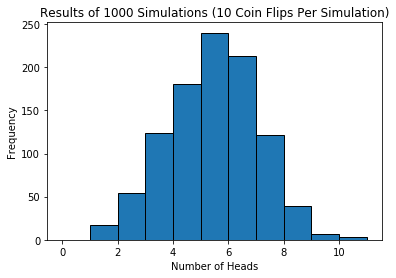

In [252]:
import random
import matplotlib.pyplot as plt

# Define the number of simulations to run
num_simulations = 1000

# Define the number of coin flips per simulation
num_flips = 10

# Initialize a list to store the results of each simulation
results = []

# Run the simulations
for i in range(num_simulations):
    heads = 0
    tails = 0
    for j in range(num_flips):
        flip = random.random()
        if flip < 0.5:
            heads += 1
        else:
            tails += 1
    results.append(heads)

# Plot the results
plt.hist(results, bins=range(num_flips+2), edgecolor='black')

# Add labels and title to the plot
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')
plt.title(f'Results of {num_simulations} Simulations ({num_flips} Coin Flips Per Simulation)')

# Show the plot
plt.show()


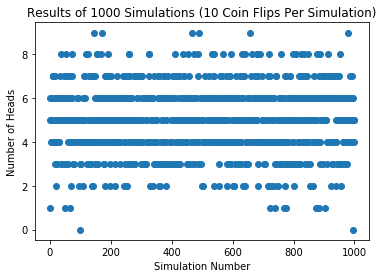

In [253]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Define the number of simulations to run
num_simulations = 1000

# Define the number of coin flips per simulation
num_flips = 10

# Initialize a list to store the results of each simulation
results = []

# Run the simulations
for i in range(num_simulations):
    heads = 0
    tails = 0
    for j in range(num_flips):
        flip = random.random()
        if flip < 0.5:
            heads += 1
        else:
            tails += 1
    results.append([i, heads])

# Convert the results to a numpy array
results_array = np.array(results)

# Plot the results
plt.scatter(results_array[:,0], results_array[:,1])

# Add labels and title to the plot
plt.xlabel('Simulation Number')
plt.ylabel('Number of Heads')
plt.title(f'Results of {num_simulations} Simulations ({num_flips} Coin Flips Per Simulation)')

# Show the plot
plt.show()
